In [1]:
from tqdm import tqdm
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l1
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.applications.vgg16 import VGG16
import numpy as np
from keras import applications

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
cd drive

/content/drive


In [5]:
cd "My Drive"

/content/drive/My Drive


In [6]:
cd 'data for colab'

/content/drive/My Drive/data for colab


#Load Data

In [0]:
validation_images=np.load('validation_images.npy')
validation_labels=np.load('validation_labels.npy')

In [0]:
train_images=np.load('train_images.npy')
train_labels=np.load('train_labels.npy')

In [0]:
train_images = train_images.astype('float32')
validation_images = validation_images.astype('float32')

In [10]:
train_labels = np_utils.to_categorical(train_labels, 15)
validation_labels = np_utils.to_categorical(validation_labels, 15)

print (train_images.shape, train_labels.shape)

validation_images /= 255
train_images /= 255

(60662, 128, 128, 3) (60662, 15)


In [0]:
# data augmentation
#Rotations-preprossing
trainGen = ImageDataGenerator(
    rescale=1/255.0,
    rotation_range=30,
    zoom_range=0.5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest')

In [0]:
trainGen.fit(train_images)

# VGG16 (didn't freeze the base model)

In [0]:
# load model without output layer
model = VGG16(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))


In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [0]:
#Adding custom Layers 
x = model.output
x=BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)
# creating the final model 
model_final = Model(inputs = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model_final.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 20
batch_size=64

In [0]:
history = model_final.fit(train_images, train_labels, 
                    batch_size=batch_size, epochs=epochs,verbose=1,
                    validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/20
60662/60662 [==============================] - 155s 3ms/step - loss: 1.8894 - accuracy: 0.3865 - val_loss: 1.3947 - val_accuracy: 0.5260
Epoch 2/20
60662/60662 [==============================] - 145s 2ms/step - loss: 1.3755 - accuracy: 0.5333 - val_loss: 1.2059 - val_accuracy: 0.5895
Epoch 3/20
60662/60662 [==============================] - 145s 2ms/step - loss: 1.2049 - accuracy: 0.5897 - val_loss: 1.1068 - val_accuracy: 0.6190
Epoch 4/20
60662/60662 [==============================] - 145s 2ms/step - loss: 1.0978 - accuracy: 0.6276 - val_loss: 1.0573 - val_accuracy: 0.6332
Epoch 5/20
60662/60662 [==============================] - 145s 2ms/step - loss: 1.0227 - accuracy: 0.6494 - val_loss: 1.0072 - val_accuracy: 0.6544
Epoch 6/20
60662/60662 [==============================] - 145s 2ms/step - loss: 0.9557 - accuracy: 0.6743 - val_loss: 1.0061 - val_accuracy: 0.6562
Epoch 7/20
60662/60662 [==============================] - 145s 

In [0]:
model_json = model_final.to_json()
with open("model_vgg16.json", "w") as json_file:
    json_file.write(model_json)

model_final.save_weights("model_vgg16.h5")
print("Saved model to disk")

Saved model to disk


Text(0.5, 1.0, 'Loss Curves')

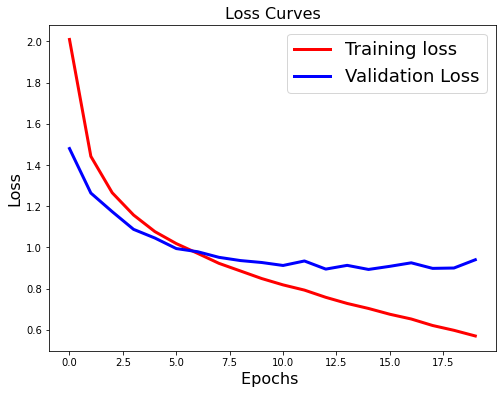

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# VGG16 Base freeze

In [0]:
# load model without output layer
model = VGG16(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))
#model.trainable=False

In [0]:
for layer in model.layers[:22]:
    layer.trainable = False

In [0]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [0]:
#Adding custom Layers 
x = model.output
x=BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)
# creating the final model 
model_VGG16_freeze = Model(inputs = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model_VGG16_freeze.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

In [0]:
# compile the model 
model_VGG16_freeze.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 20
batch_size=64

In [0]:
history_VGG16_freeze = model_VGG16_freeze.fit(train_images, train_labels, 
                    batch_size=batch_size, epochs=epochs,verbose=1,
                    validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/20
60662/60662 [==============================] - 59s 972us/step - loss: 2.3152 - accuracy: 0.2815 - val_loss: 1.8208 - val_accuracy: 0.4083
Epoch 2/20
60662/60662 [==============================] - 59s 968us/step - loss: 1.8692 - accuracy: 0.3920 - val_loss: 1.6417 - val_accuracy: 0.4504
Epoch 3/20
60662/60662 [==============================] - 58s 964us/step - loss: 1.7192 - accuracy: 0.4318 - val_loss: 1.5596 - val_accuracy: 0.4794
Epoch 4/20
60662/60662 [==============================] - 58s 963us/step - loss: 1.6299 - accuracy: 0.4566 - val_loss: 1.5068 - val_accuracy: 0.4925
Epoch 5/20
60662/60662 [==============================] - 59s 964us/step - loss: 1.5659 - accuracy: 0.4748 - val_loss: 1.4719 - val_accuracy: 0.5007
Epoch 6/20
60662/60662 [==============================] - 58s 963us/step - loss: 1.5167 - accuracy: 0.4910 - val_loss: 1.4417 - val_accuracy: 0.5133
Epoch 7/20
60662/60662 [==============================] -

In [0]:
model_VGG16_freeze.evaluate(testing_images, testing_labels,verbose=0)

[1.3126102017492909, 0.5548871159553528]

#Enhanced VGG16 (didn't freeze base model)

In [0]:
# load model without output layer
model = VGG16(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))

In [0]:
#Adding custom Layers 
x = model.output
x=BatchNormalization()(x)
x=Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x = Dropout(0.25)(x)
x=BatchNormalization()(x)
x=Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)
# creating the final model 
model_vgg16_enhanced = Model(inputs = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [0]:
# compile the model 
model_vgg16_enhanced.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 25
batch_size=64

In [0]:
history_vgg16_enhanced = model_vgg16_enhanced.fit(train_images, train_labels, 
                    batch_size=batch_size, epochs=epochs,verbose=1,
                    validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/25
60662/60662 [==============================] - 147s 2ms/step - loss: 2.5266 - accuracy: 0.2078 - val_loss: 2.0407 - val_accuracy: 0.3426
Epoch 2/25
60662/60662 [==============================] - 147s 2ms/step - loss: 2.0122 - accuracy: 0.3360 - val_loss: 1.7203 - val_accuracy: 0.4097
Epoch 3/25
60662/60662 [==============================] - 147s 2ms/step - loss: 1.7653 - accuracy: 0.4007 - val_loss: 1.5326 - val_accuracy: 0.4732
Epoch 4/25
60662/60662 [==============================] - 147s 2ms/step - loss: 1.5963 - accuracy: 0.4528 - val_loss: 1.4170 - val_accuracy: 0.5088
Epoch 5/25
60662/60662 [==============================] - 146s 2ms/step - loss: 1.4786 - accuracy: 0.4876 - val_loss: 1.3395 - val_accuracy: 0.5342
Epoch 6/25
60662/60662 [==============================] - 147s 2ms/step - loss: 1.3815 - accuracy: 0.5196 - val_loss: 1.2785 - val_accuracy: 0.5590
Epoch 7/25
60662/60662 [==============================] - 146s 

In [0]:
model_vgg16_enhanced.evaluate(testing_images, testing_labels,verbose=0)

[1.4043812813093415, 0.6375007629394531]

In [0]:
model_vgg16_enhanced.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

#Hybrid VGG16 

In [0]:
# load model without output layer
model = VGG16(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))
model.trainable=False

In [28]:
#Adding custom Layers 
x = model.output
x=BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)

# creating the final model 
model_vgg16_hybrid = Model(inputs = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [29]:
model_vgg16_hybrid.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
# compile the model 
model_vgg16_hybrid.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 5
batch_size=64

In [32]:
model_vgg16_hybrid.fit(train_images, train_labels,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/5
60662/60662 [==============================] - 151s 2ms/step - loss: 1.5684 - accuracy: 0.4705 - val_loss: 1.2411 - val_accuracy: 0.5599
Epoch 2/5
60662/60662 [==============================] - 151s 2ms/step - loss: 1.0164 - accuracy: 0.6534 - val_loss: 1.0844 - val_accuracy: 0.6543
Epoch 3/5
60662/60662 [==============================] - 151s 2ms/step - loss: 0.8365 - accuracy: 0.7148 - val_loss: 0.9971 - val_accuracy: 0.6798
Epoch 4/5
60662/60662 [==============================] - 151s 2ms/step - loss: 0.7056 - accuracy: 0.7573 - val_loss: 0.9476 - val_accuracy: 0.6760
Epoch 5/5
60662/60662 [==============================] - 150s 2ms/step - loss: 0.5695 - accuracy: 0.7995 - val_loss: 1.0304 - val_accuracy: 0.6783


In [0]:
model_vgg16_hybrid.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

In [0]:
# Train the model again and unfreeze previous frozen layers
model.trainable = True
# compile the model 
model_vgg16_hybrid.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.00001), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 2
batch_size=64

In [0]:
model_vgg16_hybrid.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

In [35]:
model_vgg16_hybrid.fit(train_images, train_labels,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/2
60662/60662 [==============================] - 151s 2ms/step - loss: 0.2823 - accuracy: 0.9006 - val_loss: 0.9225 - val_accuracy: 0.7378
Epoch 2/2
60662/60662 [==============================] - 150s 2ms/step - loss: 0.1893 - accuracy: 0.9337 - val_loss: 1.0284 - val_accuracy: 0.7357


In [41]:
#Save the model
model_json = model_vgg16_hybrid.to_json()
with open("model_vgg16_hybrid_7epoch.json", "w") as json_file:
    json_file.write(model_json)

model_vgg16_hybrid.save_weights("model_vgg16_hybrid_7epoch.h5")
print("Saved model to disk")

Saved model to disk


In [40]:
score = model_vgg16_hybrid.evaluate(testing_images, testing_labels,verbose=0)
score

[1.0774152592047308, 0.7245815992355347]

### Model Evaluation (Heatmap+confusion matrix+predictions)

In [0]:
#Load the model
json_file = open('model_vgg16_hybrid_7epoch.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

In [0]:
loaded_model.load_weights("model_vgg16_hybrid_7epoch.h5")

In [0]:
#Load testing data
testing_images=np.load('testing_images.npy')
testing_labels=np.load('testing_labels.npy')

In [0]:
testing_images = testing_images.astype('float32')
testing_labels = np_utils.to_categorical(testing_labels, 15)
testing_images /= 255

In [54]:
#store the output predictions    
y_pred = loaded_model.predict(testing_images)
y_pred

array([[1.4876337e-06, 1.7605716e-07, 5.1133946e-09, ..., 3.5757762e-07,
        2.4730452e-08, 9.9965835e-01],
       [5.5037308e-06, 6.7331200e-08, 7.3897882e-10, ..., 3.0452515e-08,
        2.2651665e-09, 9.9942529e-01],
       [6.2545616e-04, 1.7960493e-01, 2.1686221e-05, ..., 8.4398985e-03,
        1.3572398e-04, 4.9050799e-05],
       ...,
       [1.1534285e-09, 1.4935150e-10, 8.1602639e-06, ..., 1.8416896e-10,
        4.7744124e-09, 1.9749796e-12],
       [7.1290245e-11, 9.7509229e-13, 1.9184135e-06, ..., 1.6261033e-12,
        1.5896403e-09, 2.0164468e-13],
       [3.1485965e-09, 4.1444137e-10, 2.5576879e-03, ..., 5.3095794e-10,
        2.2637294e-06, 4.5917814e-10]], dtype=float32)

In [0]:
y_classes = y_pred.argmax(axis=-1)

In [0]:
testing_labels=np.load('testing_labels.npy')

In [0]:
class_names=["Dress","T-shirt","Shoes","Pants","Bag","Shirt","Boots","Jeans","Skirt","Sweater",
             "Sandals","Cardigan","Blouse","Tights","Coat"]

In [0]:
x_axis_labels = class_names
y_axis_labels = class_names

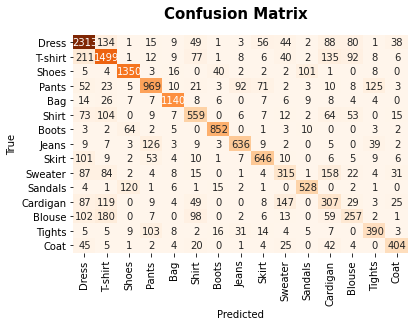

In [59]:
confusion_matrix =  pd.crosstab(index=testing_labels, columns=y_classes.ravel(), rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False, cmap="Oranges", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
# Plot Confusion Matrices
plt.suptitle('Confusion Matrix', fontsize=15, fontweight='bold')
sns.set_context("notebook", font_scale=0.7, rc={"lines.linewidth": 0.8})
plt.subplots_adjust(hspace=.7)

In [0]:
#Normalize confusion matrix
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(testing_labels, y_classes, normalize="true")*100


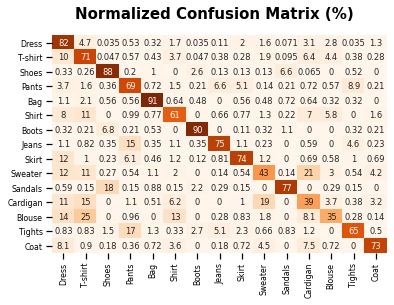

In [99]:
sns.heatmap(cf, annot=True, square=False, fmt='0.2g', cbar=False, cmap="Oranges", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
# Plot Confusion Matrices
plt.suptitle('Normalized Confusion Matrix (%)', fontsize=15, fontweight='bold')
sns.set_context("notebook", font_scale=0.7, rc={"lines.linewidth": 0.8,'figure.figsize':(15,20)})
plt.subplots_adjust(hspace=.7)

In [100]:
from sklearn.metrics import classification_report
print(classification_report(testing_labels, y_classes, target_names=class_names))

              precision    recall  f1-score   support

       Dress       0.74      0.82      0.78      2834
     T-shirt       0.68      0.71      0.70      2107
       Shoes       0.86      0.88      0.87      1534
       Pants       0.73      0.69      0.71      1397
         Bag       0.92      0.91      0.92      1246
       Shirt       0.61      0.61      0.61       911
       Boots       0.91      0.90      0.90       947
       Jeans       0.80      0.75      0.77       853
       Skirt       0.77      0.74      0.76       869
     Sweater       0.50      0.43      0.46       736
     Sandals       0.80      0.77      0.79       682
    Cardigan       0.34      0.39      0.37       787
      Blouse       0.46      0.35      0.40       727
      Tights       0.65      0.65      0.65       602
        Coat       0.75      0.73      0.74       557

    accuracy                           0.72     16789
   macro avg       0.70      0.69      0.70     16789
weighted avg       0.72   

In [0]:
import os
from tqdm import tqdm

In [0]:
def get_images(directory):
    images = []
    labels = []
    y = 0
    
    for label in tqdm(os.listdir(directory)): 
        
        if label == '368': 
            y = 0
        elif label == '52':
            y = 1
        elif label == '284':
            y = 2
        elif label == '461':
            y = 3
        elif label == '111':
            y = 4
        elif label == '505':
            y = 5
        elif label == '48':
            y = 6
        elif label == '155':
            y = 7
        elif label == '228':
            y = 8
        elif label == '160':
            y = 9
        elif label == '137':
            y = 10
        elif label == '33':
            y = 11
        elif label == '42':
            y = 12
        elif label == '516':
            y = 13
        elif label == '50':
            y = 14
        
        i=0
        for image_file in os.listdir(directory + label): 
            image = cv2.imread(directory+label+r'/'+image_file)
            image = cv2.resize(image, (128,128))
            images.append(image)
            labels.append(y)
            i=i+1
            if i>2:
              break
    
    return images, labels

In [0]:
for image_file in os.listdir(directory + label): 
    image = cv2.imread(directory+label+r'/'+image_file)
    image = cv2.resize(image, (128,128))
    images.append(image)
    labels.append(y)

In [0]:
class_number=["33","42","48","50","52","111","137","155","160","228","284","368","461","505","516"]

In [0]:
display_images=cv2.imread(directory+label+r'/'+image_file)

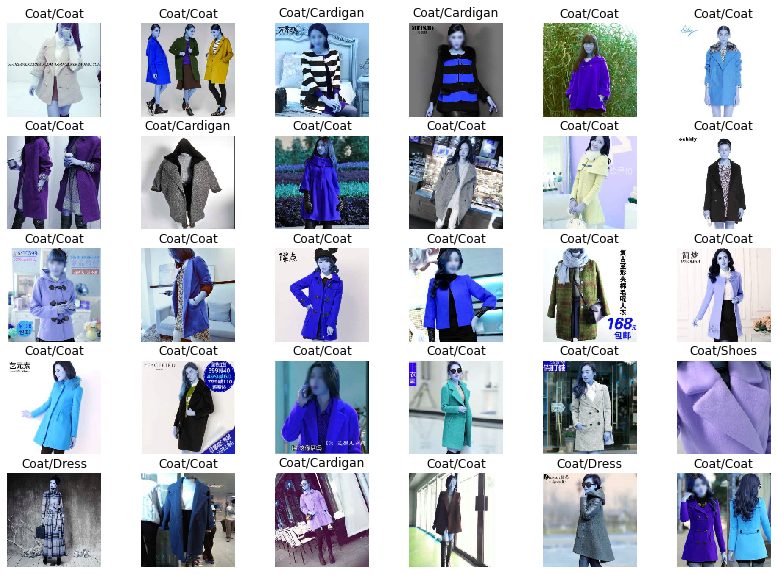

In [0]:
# Display the first few images
images_and_labels = list(zip(testing_images, y_classes))
plt.figure(figsize=(14,10))
for index, (image, label) in enumerate(images_and_labels[:30]):
    plt.subplot(5, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r,interpolation='nearest')
    imagedata = image[np.newaxis, :, :]
    pred = model.predict(imagedata)
    pred= pred[0].argmax(axis=0)
    plt.title(class_names[testing_labels[index]]+"/"+class_names[y_classes[index]],fontsize=12)
plt.show()

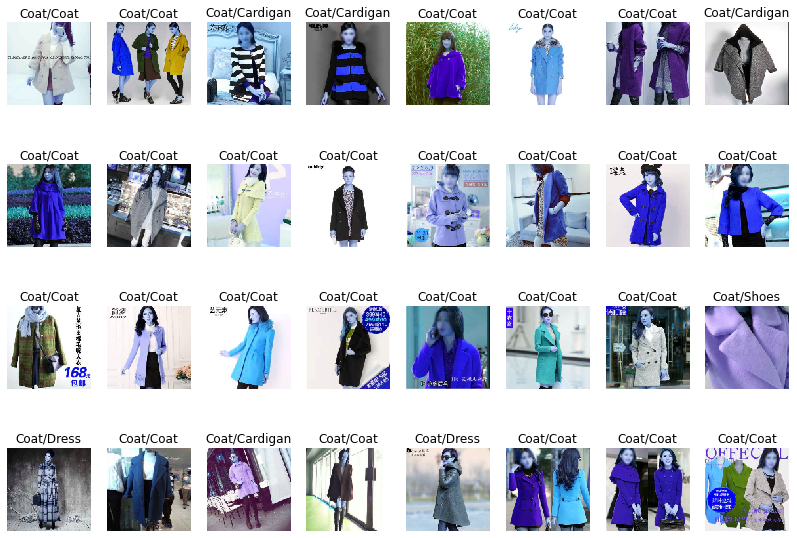

In [0]:
# Display the first few images
images_and_labels = list(zip(testing_images, y_classes))
plt.figure(figsize=(14,10))
for index, (image, label) in enumerate(images_and_labels[:32]):
    plt.subplot(4, 8, index + 1)
    plt.axis('off')
    plt.imshow(image, interpolation='nearest')
    imagedata = image[np.newaxis, :, :]
    pred = model.predict(imagedata)
    pred= pred[0].argmax(axis=0)
    plt.title(class_names[testing_labels[index]]+"/"+class_names[y_classes[index]],fontsize=12)
plt.show()

# Base VGG16 Evaluation

In [0]:
json_file = open('model_vgg16.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)

In [0]:
loaded_model.load_weights("model_vgg16.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])

In [0]:
loaded_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
testing_images=np.load('testing_images.npy')
testing_labels=np.load('testing_labels.npy')

In [0]:
testing_images=testing_images/255
testing_images=testing_images.astype('float32')

In [0]:
testing_labels = np_utils.to_categorical(testing_labels, 15)

In [0]:
score = loaded_model.evaluate(testing_images, testing_labels,verbose=0)
score

[1.0493000020516607, 0.6893203854560852]

In [0]:
#store the output predictions    
y_pred = loaded_model.predict(testing_images)
y_pred

array([[4.0943927e-05, 6.4559710e-05, 6.1692191e-07, ..., 3.6205704e-05,
        2.3821280e-05, 9.9863678e-01],
       [3.8733186e-05, 8.0898292e-07, 4.0403867e-07, ..., 1.3085511e-06,
        3.5094050e-07, 9.9981958e-01],
       [3.8929004e-04, 3.4794214e-03, 1.2965579e-05, ..., 1.3053619e-03,
        6.1936094e-06, 3.2933406e-04],
       ...,
       [5.0225158e-06, 4.5178766e-07, 3.1776975e-03, ..., 2.6537299e-07,
        8.7248236e-06, 3.5901733e-06],
       [2.9190235e-06, 4.8272892e-07, 3.8406502e-05, ..., 3.7171114e-07,
        7.0172136e-06, 1.1362115e-07],
       [6.0460778e-08, 1.7644717e-09, 9.6574932e-01, ..., 3.7735983e-09,
        4.8483685e-07, 2.1376810e-08]], dtype=float32)

In [0]:
y_classes = y_pred.argmax(axis=-1)

In [0]:
y_classes

array([14, 14,  9, ...,  6,  6,  2])

In [0]:
confusion_matrix =  pd.crosstab(index=testing_labels, columns=y_classes.ravel(), rownames=['True'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
# Plot Confusion Matrices
plt.suptitle('Confusion Matrix', fontsize=15, fontweight='bold')
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})
plt.subplots_adjust(hspace=.7)

#Base VGG 19 (didn't freeze the base model)

In [0]:
# load model without output layer
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))

In [0]:
#Adding custom Layers 
x = model.output
x=BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)

# creating the final model 
model_final2 = Model(inputs = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# compile the model 
model_final2.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 20
batch_size=64
#callback = EarlyStopping(monitor='val_accuracy', patience=4)

In [0]:
history2 = model_final2.fit(train_images, train_labels, 
                    batch_size=batch_size, epochs=epochs,verbose=1,
                    validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/20
60662/60662 [==============================] - 178s 3ms/step - loss: 1.6653 - accuracy: 0.4397 - val_loss: 1.3323 - val_accuracy: 0.5376
Epoch 2/20
60662/60662 [==============================] - 177s 3ms/step - loss: 1.1218 - accuracy: 0.6202 - val_loss: 1.0632 - val_accuracy: 0.6490
Epoch 3/20
60662/60662 [==============================] - 177s 3ms/step - loss: 0.9403 - accuracy: 0.6799 - val_loss: 1.0239 - val_accuracy: 0.6524
Epoch 4/20
60662/60662 [==============================] - 177s 3ms/step - loss: 0.8154 - accuracy: 0.7226 - val_loss: 0.9662 - val_accuracy: 0.6842
Epoch 5/20
60662/60662 [==============================] - 177s 3ms/step - loss: 0.7025 - accuracy: 0.7564 - val_loss: 0.9571 - val_accuracy: 0.6972
Epoch 6/20
60662/60662 [==============================] - 177s 3ms/step - loss: 0.5893 - accuracy: 0.7949 - val_loss: 1.0049 - val_accuracy: 0.6829
Epoch 7/20
60662/60662 [==============================] - 177s 

In [0]:
model_final2.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
model_final2.evaluate(testing_images, testing_labels,verbose=0)

[1.5840105039341987, 0.6869378685951233]

#Base VGG19-Freeze the base

In [0]:
# load model without output layer
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))

In [0]:
for layer in model.layers[:22]:
    layer.trainable = False

In [0]:
#Adding custom Layers 
x = model.output
x=BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)

# creating the final model 
model_VGG19_base_freeze= Model(inputs = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
model_VGG19_base_freeze.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0  

In [0]:
# compile the model 
model_VGG19_base_freeze.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 20
batch_size=64

In [0]:
history_VGG19_base_freeze = model_VGG19_base_freeze.fit(train_images, train_labels, 
                    batch_size=batch_size, epochs=epochs,verbose=1,
                    validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/20
60662/60662 [==============================] - 70s 1ms/step - loss: 1.6503 - accuracy: 0.4511 - val_loss: 1.3659 - val_accuracy: 0.5324
Epoch 2/20
60662/60662 [==============================] - 69s 1ms/step - loss: 1.2753 - accuracy: 0.5652 - val_loss: 1.3128 - val_accuracy: 0.5496
Epoch 3/20
60662/60662 [==============================] - 69s 1ms/step - loss: 1.0785 - accuracy: 0.6306 - val_loss: 1.2938 - val_accuracy: 0.5584
Epoch 4/20
60662/60662 [==============================] - 69s 1ms/step - loss: 0.9087 - accuracy: 0.6872 - val_loss: 1.3371 - val_accuracy: 0.5656
Epoch 5/20
60662/60662 [==============================] - 69s 1ms/step - loss: 0.7569 - accuracy: 0.7395 - val_loss: 1.3653 - val_accuracy: 0.5636
Epoch 6/20
60662/60662 [==============================] - 69s 1ms/step - loss: 0.6163 - accuracy: 0.7882 - val_loss: 1.4390 - val_accuracy: 0.5639
Epoch 7/20
60662/60662 [==============================] - 69s 1ms/ste

In [0]:
model_VGG19_base_freeze.evaluate(testing_images, testing_labels,verbose=0)

[2.49641015197474, 0.5598903894424438]

#Enhanced VGG19---unfreeze

In [0]:
# load model without output layer
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))

In [0]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [0]:
#for layer in model.layers[:22]:
    #layer.trainable = False

In [0]:
#Adding custom Layers 
x = model.output
x=BatchNormalization()(x)
x=Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x = Dropout(0.25)(x)
x=BatchNormalization()(x)
x=Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2),padding='same')(x)
x = Dropout(0.5)(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)
# creating the final model 
model_final_vgg19enhanced = Model(inputs = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  app.launch_new_instance()


In [0]:
model_final_vgg19enhanced.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
# compile the model 
model_final_vgg19enhanced.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [0]:
# Fit model
epochs = 20
batch_size=64
#callback = EarlyStopping(monitor='val_accuracy', patience=4)

In [0]:
history_vgg19enhanced = model_final_vgg19enhanced.fit(train_images, train_labels, 
                    batch_size=batch_size, epochs=epochs,verbose=1,
                    validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/20
60662/60662 [==============================] - 172s 3ms/step - loss: 2.5157 - accuracy: 0.2152 - val_loss: 1.8647 - val_accuracy: 0.3765
Epoch 2/20
60662/60662 [==============================] - 171s 3ms/step - loss: 1.8849 - accuracy: 0.3723 - val_loss: 1.5611 - val_accuracy: 0.4655
Epoch 3/20
60662/60662 [==============================] - 171s 3ms/step - loss: 1.6198 - accuracy: 0.4403 - val_loss: 1.3968 - val_accuracy: 0.4947
Epoch 4/20
60662/60662 [==============================] - 171s 3ms/step - loss: 1.4705 - accuracy: 0.4892 - val_loss: 1.2784 - val_accuracy: 0.5661
Epoch 5/20
60662/60662 [==============================] - 171s 3ms/step - loss: 1.3570 - accuracy: 0.5262 - val_loss: 1.1932 - val_accuracy: 0.5903
Epoch 6/20
60662/60662 [==============================] - 171s 3ms/step - loss: 1.2761 - accuracy: 0.5554 - val_loss: 1.1909 - val_accuracy: 0.5832
Epoch 7/20
60662/60662 [==============================] - 171s 

In [0]:
score = model_final_vgg19enhanced.evaluate(testing_images, testing_labels,verbose=0)
score

[1.092931078301695, 0.6657930612564087]

# Hybrid VGG19

In [42]:
# load model without output layer
model = applications.VGG19(weights = "imagenet", include_top=False, input_shape = (128, 128, 3))
model.trainable = False

80142336/80134624 [==============================] - 2s 0us/step


In [43]:
#Adding custom Layers 
x = model.output
x=BatchNormalization()(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(15, activation="softmax")(x)

# creating the final model 
model_final4 = Model(inputs = model.input, output = predictions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# compile the model 
model_final4.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 5
batch_size=64

In [47]:
model_final4.fit(train_images, train_labels,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/5
60662/60662 [==============================] - 176s 3ms/step - loss: 1.8106 - accuracy: 0.3927 - val_loss: 1.4766 - val_accuracy: 0.5077
Epoch 2/5
60662/60662 [==============================] - 176s 3ms/step - loss: 1.1740 - accuracy: 0.5997 - val_loss: 1.1518 - val_accuracy: 0.6215
Epoch 3/5
60662/60662 [==============================] - 176s 3ms/step - loss: 0.9708 - accuracy: 0.6682 - val_loss: 0.9878 - val_accuracy: 0.6655
Epoch 4/5
60662/60662 [==============================] - 176s 3ms/step - loss: 0.8427 - accuracy: 0.7106 - val_loss: 1.0327 - val_accuracy: 0.6504
Epoch 5/5
60662/60662 [==============================] - 176s 3ms/step - loss: 0.7198 - accuracy: 0.7503 - val_loss: 1.0133 - val_accuracy: 0.6861


In [0]:
model_final4.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0   

In [0]:
# Train the model again and unfreeze previous frozen layers
model.trainable = True
# compile the model 
model_final4.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.00001), metrics=["accuracy"])


In [0]:
# Fit model
epochs = 2
batch_size=64

In [50]:
model_final4.fit(train_images, train_labels,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(validation_images,validation_labels),shuffle=True)

Train on 60662 samples, validate on 6780 samples
Epoch 1/2
60662/60662 [==============================] - 177s 3ms/step - loss: 0.4528 - accuracy: 0.8396 - val_loss: 0.8619 - val_accuracy: 0.7273
Epoch 2/2
60662/60662 [==============================] - 176s 3ms/step - loss: 0.3532 - accuracy: 0.8734 - val_loss: 0.8978 - val_accuracy: 0.7298


In [0]:
#Save the model
model_json = model_final4.to_json()
with open("model_vgg19_hybrid.json", "w") as json_file:
    json_file.write(model_json)

model_final4.save_weights("model_vgg19_hybrid.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
#Evaluate the model
testing_images=np.load('testing_images.npy')
testing_labels=np.load('testing_labels.npy')
testing_images=testing_images/255
testing_images=testing_images.astype('float32')

In [0]:
testing_labels = np_utils.to_categorical(testing_labels, 15)

In [51]:
score = model_final4.evaluate(testing_images, testing_labels,verbose=0)
score

[0.9291679094914378, 0.7164810299873352]

# Xception

In [0]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(128, 128, 3),
    include_top=False,
) 

In [0]:
# Freeze the base_model
base_model.trainable = False

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [0]:
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs) 

In [0]:
# Pre-trained Xception weights requires that input be normalized
# from (0, 255) to a range (-1., +1.), the normalization layer
# does the following, outputs = (inputs - mean) / sqrt(var)
import tensorflow as tf
norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
mean = np.array([127.5] * 3)
var = mean ** 2
# Scale inputs to [-1, +1]


In [0]:
x = norm_layer(x)
norm_layer.set_weights([mean, var])

In [0]:
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.3)(x)  # Regularize with dropout
outputs = keras.layers.Dense(15)(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 128, 128, 3)       0         
_________________________________________________________________
xception (Model)             (None, 4, 4, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                30735     
Total params: 20,892,215
Trainable params: 20,837,687
Non-trainable params: 54,528
__________________________________________

In [0]:
model.compile(loss = "categorical_crossentropy", optimizer = keras.optimizers.Adam(lr=0.0001), metrics=["accuracy"])

In [0]:
# Fit model
epochs = 20
batch_size=64
callback = EarlyStopping(monitor='val_accuracy', patience=4)

In [0]:
history = model.fit(train_images, train_labels, 
                    batch_size=batch_size, epochs=epochs,verbose=1,
                    validation_data=(validation_images,validation_labels),shuffle=True)

Epoch 1/20
948/948 [==============================] - 234s 247ms/step - loss: 7.9977 - accuracy: 0.0950 - val_loss: 8.1684 - val_accuracy: 0.0866
Epoch 2/20
948/948 [==============================] - 232s 245ms/step - loss: 7.8954 - accuracy: 0.0977 - val_loss: 8.3182 - val_accuracy: 0.1686
Epoch 3/20
948/948 [==============================] - 233s 245ms/step - loss: 7.9366 - accuracy: 0.1030 - val_loss: 7.6644 - val_accuracy: 0.1043
Epoch 4/20
948/948 [==============================] - 232s 245ms/step - loss: 7.9794 - accuracy: 0.0949 - val_loss: 7.6953 - val_accuracy: 0.1198
Epoch 5/20
948/948 [==============================] - 234s 247ms/step - loss: 7.7410 - accuracy: 0.0900 - val_loss: 7.6620 - val_accuracy: 0.0903
Epoch 6/20
948/948 [==============================] - 233s 246ms/step - loss: 7.8402 - accuracy: 0.0827 - val_loss: 7.6597 - val_accuracy: 0.0575
Epoch 7/20
948/948 [==============================] - 234s 247ms/step - loss: 8.0070 - accuracy: 0.0808 - val_loss: 7.6002 -

In [0]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 128, 128, 3)       0         
_________________________________________________________________
xception (Model)             (None, 4, 4, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                30735     
Total params: 20,892,215
Trainable params: 20,837,687
Non-trainable params: 54,528
__________________________________________

In [0]:

model.fit(train_images, train_labels, 
                    batch_size=batch_size, epochs=10,verbose=1,
                    validation_data=(validation_images,validation_labels),shuffle=True)

Epoch 1/10
948/948 [==============================] - 235s 247ms/step - loss: 2.7742 - accuracy: 0.1393 - val_loss: 1.1921e-07 - val_accuracy: 0.1622
Epoch 2/10
948/948 [==============================] - 233s 246ms/step - loss: 1.1921e-07 - accuracy: 0.1687 - val_loss: 1.1921e-07 - val_accuracy: 0.1622
Epoch 3/10
948/948 [==============================] - 234s 247ms/step - loss: 1.1921e-07 - accuracy: 0.1687 - val_loss: 1.1921e-07 - val_accuracy: 0.1622
Epoch 4/10
948/948 [==============================] - 234s 247ms/step - loss: 1.1921e-07 - accuracy: 0.1687 - val_loss: 1.1921e-07 - val_accuracy: 0.1622
Epoch 5/10
948/948 [==============================] - 234s 247ms/step - loss: 1.1921e-07 - accuracy: 0.1687 - val_loss: 1.1921e-07 - val_accuracy: 0.1622
Epoch 6/10
948/948 [==============================] - 234s 247ms/step - loss: 1.1921e-07 - accuracy: 0.1687 - val_loss: 1.1921e-07 - val_accuracy: 0.1622
Epoch 7/10
948/948 [==============================] - 234s 247ms/step - loss: 1.

https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/
